In [6]:
from darkflow.net.build import TFNet
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [7]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('custom_darkflow','cfg','yolov2.cfg'),
        'load':os.path.join('custom_darkflow','bin','yolov2.weights'),
        'threshold':0.2,
        'gpu':1.0
    }
    tfnet = TFNet(options)

Parsing custom_darkflow\cfg\yolov2.cfg
Loading custom_darkflow\bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.014961719512939453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky     

In [8]:

# img = cv2.imread('test/training/images/1.jpg',cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(img)

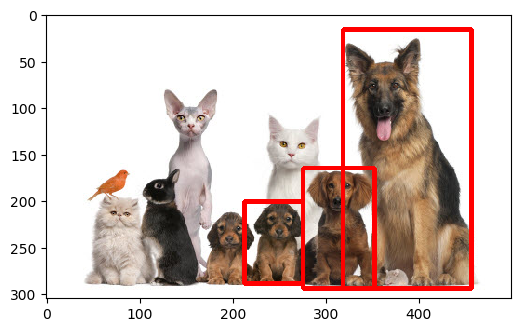

In [13]:
img = cv2.imread(os.path.join('custom_darkflow','test_images','2.jpg'),cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
plt.figure(dpi=100)
for r in result:
    tl = (r['topleft']['x'], r['topleft']['y'])
    br = (r['bottomright']['x'], r['bottomright']['y'])
    label = r['label']
    if label == 'dog':     
#         conf = r['confidence']
        text = '{}({:.2f})'.format(label,conf)
        img = cv2.rectangle(img,tl,br,(255,0,0),thickness=3)
#         img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_SIMPLEX ,1,(255,0,0),3)
#     else:
#         img = cv2.rectangle(img,tl,br,(0,0,255),thickness=1)
#         img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_SIMPLEX ,0.5,(0,0,255),2)

plt.imshow(img)